## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')

In [3]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
n_rows,n_cols=df.shape

In [5]:
n_rows

294478

c. The number of unique users in the dataset.

In [6]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [7]:
df.converted.mean()*100

11.96591935560551

e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
df.query('group== "control" and landing_page== "new_page"').shape[0]+df.query('group== "treatment" and landing_page== "old_page"').shape[0]

3893

f. Do any of the rows have missing values?

In [9]:
df[df.isnull().any(axis=1)]

,user_id,timestamp,group,landing_page,converted


No, there are no rows having at least one missing value

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df2=pd.concat([df.query('group== "control" and landing_page== "old_page"'),df.query('group== "treatment" and landing_page== "new_page"')],ignore_index=True)

In [11]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,864975,2017-01-21 01:52:26.210827,control,old_page,1
3,936923,2017-01-10 15:20:49.083499,control,old_page,0
4,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
df2[df2.user_id.duplicated()]['user_id']

146678    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [15]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
146678,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
index_to_drop=df2[df2.user_id.duplicated()].index.values

In [17]:
df2.drop(index_to_drop, axis=0,inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
p_conversion=(df2['converted']==1).mean()
p_conversion

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
p_conv_given_control=(df2.query('group=="control"')['converted']==True).mean()

In [20]:
p_conv_given_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
p_conv_given_treatment=(df2.query('group=="treatment"')['converted']==True).mean()

In [22]:
p_conv_given_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

The probability of an individual receiving a new page is the same as the probability of being a treatment group individual

In [23]:
p_newpage=(df2['landing_page']=='new_page').mean()
p_newpage

0.5000619442226688

In [24]:
p_treatment=(df2['group']=='treatment').mean()
p_treatment

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Probability of conversion given the old page(control group)=0.1203 is slightly higher than probability of conversion given the new page(treatment group)=0.1188 so this means there's no sufficient evidence to say that the new page leads to more conversions.

In [25]:
p_conv_given_treatment*p_treatment/p_conversion

0.49676286939257047

this computation means that the probability of a page being new given that the individual converted is 0.496

In [26]:
p_conv_given_control*(1-p_treatment)/p_conversion

0.5032371306074297

this computation means that the probability of a page being old given that the individual converted is 0.503

Conclusion:There is no sufficient evidence that says that the new page leads to more conversions

**Your answer goes here.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

### H0: $p_{new}$ -  $p_{old}$<=0

### H1: $p_{new}$ -  $p_{old}$>0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [27]:
null_conv_rate=(df2['converted']==1).mean()

In [28]:
print('convert rate for Pnew is the null conversion rate : ',null_conv_rate)

convert rate for Pnew is the null conversion rate :  0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [29]:
print('convert rate for Pold is the null conversion rate : ',null_conv_rate)

convert rate for Pold is the null conversion rate :  0.11959708724499628


c. What is $n_{new}$?

In [30]:
n_new=(df2['landing_page']=="new_page").sum()
print('n_new : ',n_new)

n_new :  145310


d. What is $n_{old}$?

In [31]:
n_old=(df2['landing_page']=="old_page").sum()
print('n_old : ',n_old)

n_old :  145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [32]:
new_page_converted=np.random.choice([1,0], n_new, p=[null_conv_rate,1-null_conv_rate])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [33]:
old_page_converted=np.random.choice([1,0], n_old, p=[null_conv_rate,1-null_conv_rate])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [34]:
p_diff=new_page_converted.mean() - old_page_converted.mean()

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [35]:
p_diffs=[]
for _ in range(10000):
    new_page_converted=np.random.choice([1,0], n_new, p=[null_conv_rate,1-null_conv_rate])
    old_page_converted=np.random.choice([1,0], n_old, p=[null_conv_rate,1-null_conv_rate])
    p_diff=new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

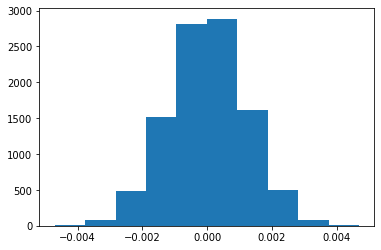

In [36]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [37]:
observed_new_conv_rate=(df2.query('landing_page=="new_page"')['converted']==1).mean()
observed_old_conv_rate=(df2.query('landing_page=="old_page"')['converted']==1).mean()

observed_conv_rate_diff=observed_new_conv_rate-observed_old_conv_rate
observed_conv_rate_diff

-0.0015782389853555567

In [38]:
p_value=(p_diffs>observed_conv_rate_diff).mean()
print('proportion of p_diffs greater than the observed difference : ',p_value)

proportion of p_diffs greater than the observed difference :  0.9063


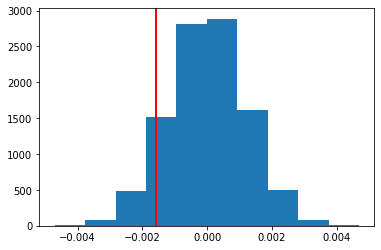

In [39]:
plt.hist(p_diffs);
plt.axvline(observed_conv_rate_diff, c='r', linewidth=2);

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**


In our problem, the proportion of values under the null greater than the observed statistic is called the p_value.

If the p_value is large then this means there is a larger probability that this statistic comes from the null hypothesis
than it is to be coming from the alternative hypothesis. If it is a small value then it is more likely to have come from the alternative hypothesis.

We make a decision based on Type I error rate (alpha);
- if the p_value is greater than alpha, then we fail to reject the null hypothesis.
- if the p_value is less than alpha, then we reject the null hypothesis.

In our case here, alpha=0.05, p_value=0.9, since p_value > alpha, then we fail to reject the null hypothesis. That is the difference in conversion rates between the new and old page is zero.
This means we don't have enough evidence to say that the new page is better than the old one in terms of conversion rate.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [40]:
import statsmodels.api as sm

convert_new = df2.query('landing_page=="new_page"')['converted'].sum() # number of converts in the group  presented the new page
convert_old = df2.query('landing_page=="old_page"')['converted'].sum() # number of converts in the group  presented the old page
samples=np.array([n_new,n_old]) # number of new, old pages presented
successes=np.array([convert_new, convert_old])

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [41]:
zstat, p_value = sm.stats.proportions_ztest(count=successes, nobs=samples,  alternative='larger', value=0)

In [42]:
zstat

-1.3109241984234394

In [43]:
p_value

0.9050583127590245

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- The zstat computed means that the difference in converts observed would be -1.31 standard deviations away from the null mean .( negative means 1.3 stds below the mean ) This suggests that the  null hypothesis is likely to generate this sample statistic.
- The p_value of 0.9 is the same as computed before, which is larger than alpha=0.05 suggesting that we can't reject the null hypothesis.
- Conclusion: we don't have enough evidence to say the new page has higher conversion rate than the old page. 
    

**Put your answer here.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

We use Logistic Regression for classifying binary output of conversion or no conversion

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [44]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,864975,2017-01-21 01:52:26.210827,control,old_page,1
3,936923,2017-01-10 15:20:49.083499,control,old_page,0
4,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [45]:
df2['intercept']=1
df2['ab_page']=pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
3,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
4,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [46]:
logreg=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=logreg.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [47]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 11 Oct 2020   Pseudo R-squ.:               8.077e-06
Time:                        15:50:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

In [48]:
1/np.exp(-0.0150)

1.015113064615719

P_value for ab_page is 0.190
- For the logistic regression summary, the null hypothesis is that none of the variables (intercept, ab_page) is statistically significant to the model predicting whether a conversion occurs or not (that is these variables are zero in the null hypothesis). the Alternative states that they are significant and non-zero. Considering the p_value we get of 0.190 for the ab_page, this means that ab_page is Not statistically significant in our prediction of conversion or not. Upon that, **results can be interpreted as the chance of conversion when presented an old page is 1.015 more likely than that when presented the new page which is NOT statistically significant and means that the page type doesn't impact the conversion. i.e the new page isn't any better than the old one in terms of conversion rate.** 


- In part ||, the p_value was associated with the difference in conversion rates between new and old page, and it represented the probability of our statistic (diff in conversion rates) coming from the null hypothesis - which states that there's no difference in conversion rates between old and new page. a p_value of 0.897 suggests higher probability that the null is true ,so **we accept that the new page doesn't have a higher conversion rate than the old page**.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

- we might want to add other factors to better enhance the predictions of the model by fitting more complex relationships in the data .
- the cost or the disadvantage of this addition is difficult interpretability of the results regarding coefficient terms.

- for example, the way a variable relates to the output or response might be dependent on another variable, so to account for this we might need to add an interaction term between these two variables.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [49]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [50]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [51]:
### Create the necessary dummy variables
countries_dummy=pd.get_dummies(df_new['country'])
df_new=df_new.join(countries_dummy)

In [52]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [53]:
logreg_individual_effects=sm.Logit(df_new['converted'],df_new[['intercept','ab_page','CA','UK']])
results_individual_effects=logreg_individual_effects.fit()
results_individual_effects.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 11 Oct 2020   Pseudo R-squ.:               2.323e-05
Time:                        15:50:32   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [71]:
p=np.exp(results_individual_effects.params)

In [72]:
1/p

intercept    7.310207
ab_page      1.015056
CA           1.041599
UK           0.990165
dtype: float64

**Now we can inerpret the new results of individual effects country and page as**:
   - Chance of conversion when presented an old page is 1.015 more likely than that when presented the new page holding the country constant - which is NOT statistically significant due to p_value of 0.191.
   - Chance of conversion of a resident of CA is 1.0416 less likely than that of a resident in US holding page constant - which is NOT statistically significant due to p_value of 0.130.
   - Chance of conversion of a resident of UK is 1.009 more likely than that of a resident in US holding page constant - which is Not statistically significant due to a p_value of 0.457.
### Conclusion 
  
       Country is NOT statistically significant in prediction of convert or not. 
    

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

- **I want to model the interaction between two categorical variables (ab_page,country) each having 2, 3 categorical levels respectively ,so we need (2-1)*(3-1)=2 more dummies (interaction terms) on top of the dummies used to model each variable individually.**

**That is a total of 1 (ab_page) + 2 ('CA','UK') + 2 ('CA#Page','UK#Page') = 5 dummy variables .**

In [58]:
## Modelling interaction terms
df_new['CA#Page']=df_new['CA']*df_new['ab_page']
df_new['UK#Page']=df_new['UK']*df_new['ab_page']

In [59]:
### Fit Your Linear Model And Obtain the Results
logreg_interaction=sm.Logit(df_new['converted'],df_new[['intercept','ab_page','CA','UK','CA#Page','UK#Page']])
results_interaction=logreg_interaction.fit()
results_interaction.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 11 Oct 2020   Pseudo R-squ.:               3.482e-05
Time:                        16:02:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA#Page       -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK#Page        0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

In [65]:
k=np.exp(results_interaction.params)

In [66]:
1/k

intercept    7.289813
ab_page      1.020776
CA           1.017682
UK           1.005761
CA#Page      1.048001
UK#Page      0.969090
dtype: float64

In [67]:
k[-1]

1.0318959095680877

**Interpretation of results of interaction between country and page**

- We find that 'CA#Page', 'UK#Page' have p_values 0.383 and 0.238 which implies they are Not statistically significant in prediction of conversion or not. 
- Also , this means that the effect of ab_page on conversion - although not significant- doesn't depend on country

  ### Conclusion
    We conclude that interaction between country and page has NO significant effect on conversion.

**Additional Interpretation of coeficients**
- Conversion when presented an old page by resident of US is 1.0207 more likely than that when presented a new page.
- Chance of conversion of resident in US when presented an old page is 1.017 times MORE likely that of a resident of CA when presented old page - which is NOT statistically significant with p_value = 0.642.
- Chance of conversion of resident in US when presented an old page is 1.0057 times MORE likely than that of a resident of UK when presented old page - which is NOT statistically significant with p_value = 0.760.
- Chance of conversion of resident in US when presented a new page is 1.048 times MORE likely than that of a resident of CA when presented a new page - which is NOT statistically significant with p_value = 0.383.
- Chance of conversion of resident in US when presented an new page is 1.0318 times LESS likely than that of a resident of UK when presented a new page - which is NOT statistically significant with p_value = 0.238.